In [1]:
import pandas as pd 
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('complete.csv')# Lectura del archivo

In [3]:
# se detecto que  los datos presentan valor NA/NaN (Not a Number)
df= df.fillna(value=0) # Se procede a reemplazar los NaN por 0

In [4]:
data = df[:17750][:]

In [5]:
data = data.values # convertir dataframe en array de arrays
print(data)

[[20801 'Cristiano Ronaldo' 'C. Ronaldo dos Santos Aveiro' ..., False False
  False]
 [158023 'L. Messi' 'Lionel Messi' ..., False False False]
 [190871 'Neymar' 'Neymar da Silva Santos Jr.' ..., False False False]
 ..., 
 [239029 "S. O'Mahony" "Sean O'Mahony" ..., False False False]
 [240567 'T. Widdrington' 'Theo Widdrington' ..., False False False]
 [233912 'E. Damgaard' 'Emil Damgaard' ..., False False False]]


In [6]:
y = df['eur_wage'].values.reshape(-1,1) # seleccionar el 'SALARIO en euros' como variable DEPENDIENTE
x1 = df['overall'].values.reshape(-1,1) # seleccionar el 'Rendimiento general' como variable INDEPENDIENTE

In [7]:
y

array([[ 565000.],
       [ 565000.],
       [ 280000.],
       ..., 
       [   1000.],
       [   1000.],
       [   1000.]])

In [8]:
x1

array([[94],
       [93],
       [92],
       ..., 
       [46],
       [46],
       [46]], dtype=int64)

In [9]:
poly = PolynomialFeatures(degree=5) # Seleccionar el modelo plinomico de grado 5


In [10]:
x_p = poly.fit_transform(x1) # transformacion polinomica de x1

In [11]:
clf = linear_model.LinearRegression().fit(x_p,y) # ajuste del modelo lineal

In [12]:
x_p

array([[  1.00000000e+00,   9.40000000e+01,   8.83600000e+03,
          8.30584000e+05,   7.80748960e+07,   7.33904022e+09],
       [  1.00000000e+00,   9.30000000e+01,   8.64900000e+03,
          8.04357000e+05,   7.48052010e+07,   6.95688369e+09],
       [  1.00000000e+00,   9.20000000e+01,   8.46400000e+03,
          7.78688000e+05,   7.16392960e+07,   6.59081523e+09],
       ..., 
       [  1.00000000e+00,   4.60000000e+01,   2.11600000e+03,
          9.73360000e+04,   4.47745600e+06,   2.05962976e+08],
       [  1.00000000e+00,   4.60000000e+01,   2.11600000e+03,
          9.73360000e+04,   4.47745600e+06,   2.05962976e+08],
       [  1.00000000e+00,   4.60000000e+01,   2.11600000e+03,
          9.73360000e+04,   4.47745600e+06,   2.05962976e+08]])

In [13]:
y_pred = clf.predict(x_p) # predicciones

In [14]:
# Descripcion del modelo
print('coeficientes del modelo:', clf.coef_)
print('error cuadratico medio:',mean_squared_error(y, y_pred))
print('puntuacion varianza:',r2_score(y,y_pred))

coeficientes del modelo: [[  0.00000000e+00   1.26972385e+06  -4.04381737e+04   6.41239864e+02
   -5.07042881e+00   1.60264878e-02]]
error cuadratico medio: 132795935.678
puntuacion varianza: 0.750056326026


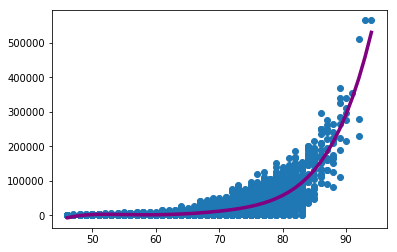

In [27]:
# grafica del modelo
plt.scatter(x1,y)
plt.plot(x1, y_pred, color='purple', linewidth=3.5)
plt.show()